# Store Analysis

# Content Table

# Introduction
This dataset contains captures of detailed transactions from a supermarket, including product categories, unit prices, quantities, and gross income. It also records customer demographics like gender, payment method, and membership type.

We are going to analyze the following points: 

* Sale trends
* Customer behavior
* Revenue performance

The process for this report will be the next:

1. Description and corrections of the data
2. Data Analysis
   1. Sale Trends
   2. Customer Behavior
   3. Revenue Performance
3. Conclusions

Having said that, we are going to begin with the project: 

# 1. Description and corrections of the data

Before continuing, let's add the description of the columns of the dataset: 



   * **Invoice ID**: A unique identifier for each transaction or purchase. This is typically a string or alphanumeric code.

   * **Branch**: Indicates the specific branch of the supermarket where the transaction took place. This could be categorical (e.g., "A", "B", "C").

   * **City**:The city where the supermarket branch is located. This is also categorical and helps in geographic analysis.

   * **Customer Type**: Defines the type of customer (e.g., "Member" or "Normal"). This could be useful for segmentation and understanding purchasing behavior.

   * **Gender**: The gender of the customer (e.g., "Male" or "Female"). This can be useful for demographic analysis.

   * **Product Line**: Specifies the category of products purchased (e.g., "Groceries", "Clothing", "Electronics"). This helps in product performance analysis.

   * **Unit Price**: The price of a single unit of the product. This is a continuous numerical value.

   * **Quantity**: The number of units purchased in a single transaction. This is also a continuous numerical value.

   * **Tax 5%**:The amount of tax applied to the purchase, calculated as 5% of the total before tax. This is a continuous numerical value.

   * **Total**: The total amount paid by the customer, including tax. This is a continuous numerical value.

   * **Date**:The date of the transaction, which can help in time series analysis. Format is typically in YYYY-MM-DD.

   * **Time**:The time of the transaction, which can be used to analyze peak shopping hours.

   * **Payment**:The method of payment used (e.g., "Cash", "Credit Card", "Debit Card"). This is categorical and provides insights into payment preferences.

   * **COGS**: Cost of Goods Sold, representing the total cost of producing the goods sold. This is a continuous numerical value.

   * **Gross Margin Percentage**: The percentage difference between sales and the cost of goods sold, indicating the profitability of sales.

   * **Gross Income**:The income remaining after deducting the cost of goods sold from total sales. This is a continuous numerical value.

   * **Rating**:The customer’s rating of the product or service, usually on a scale (e.g., 1 to 5). This can help in understanding customer satisfaction.

   

Now let's continue with the procedure. We are going to describe the data and review if there is any corrections, missing data or duplicates.

In [1]:
# Loading libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Stablish the theme of the charts
sns.set_theme(style="darkgrid")

In [3]:
# Loading data
df = pd.read_csv("./datasets/supermarket_sales.csv")

In [4]:
# Describe the data
display(df.info())
display(df.describe())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

None

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


As we can see, the name for the columns don't follow the "snake_case" methology, some columns (`Date` and `Time`) don't match the appropriate data type, we can confirm that there is no missing data. Also we are going to corroborate if there is any duplicated data: 

In [5]:
# Checking for duplicated data: 
display(df[df.duplicated()])

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating


We do not have duplicated information in the dataset, so we can continue with the corrections:

## Columns name change:

In [6]:
# Creating an array to store the new columns names: 
new_col_names = []

# Creating a for loop to change the names for the columns
for old_name in df.columns:
    # Stripping the names of the old columns:
    name_stripped = old_name.strip()
    # Lowering the old columns names: 
    name_lowered = name_stripped.lower()
    # Changing spaces for "_":
    name_no_spaces = name_lowered.replace(" ", "_")
    # adding the new name to the array:
    new_col_names.append(name_no_spaces)
    
# Changing the old names for the new ones:
df.columns = new_col_names

df.head()

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


## Changing data types

In [7]:
# Changing data type for the column "date":
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')

# Changing data type for the column "time":
df['time'] = pd.to_datetime(df['time'], format='%H:%M')

# Corroborating the changes: 
print(df.info())
df[['date','time']].head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   invoice_id               1000 non-null   object        
 1   branch                   1000 non-null   object        
 2   city                     1000 non-null   object        
 3   customer_type            1000 non-null   object        
 4   gender                   1000 non-null   object        
 5   product_line             1000 non-null   object        
 6   unit_price               1000 non-null   float64       
 7   quantity                 1000 non-null   int64         
 8   tax_5%                   1000 non-null   float64       
 9   total                    1000 non-null   float64       
 10  date                     1000 non-null   datetime64[ns]
 11  time                     1000 non-null   datetime64[ns]
 12  payment                  1000 non-n

,date,time
0,2019-01-05,1900-01-01 13:08:00
1,2019-03-08,1900-01-01 10:29:00
2,2019-03-03,1900-01-01 13:23:00
3,2019-01-27,1900-01-01 20:33:00
4,2019-02-08,1900-01-01 10:37:00


As we can see the column `time` also have a date, so we are going to divide the information in two new integer columns `hours` and `minutes`:

In [8]:
# Creating the new columns: 

# hour
df['hour'] = df['time'].dt.hour

# minutes
df['minutes'] = df['time'].dt.minute

df.head()

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating,hour,minutes
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,1900-01-01 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,13,8
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,1900-01-01 10:29:00,Cash,76.40,4.761905,3.8200,9.6,10,29
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,1900-01-01 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,13,23
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,1900-01-01 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,20,33
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,1900-01-01 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,10,37


Now we can drop the column `time`:

In [9]:
# Deleting the column "time"
df = df.drop('time', axis=1)

df.head()

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,date,payment,cogs,gross_margin_percentage,gross_income,rating,hour,minutes
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,Ewallet,522.83,4.761905,26.1415,9.1,13,8
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,Cash,76.40,4.761905,3.8200,9.6,10,29
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,Credit card,324.31,4.761905,16.2155,7.4,13,23
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,Ewallet,465.76,4.761905,23.2880,8.4,20,33
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,Ewallet,604.17,4.761905,30.2085,5.3,10,37


Now let's complement the data with the day of the month and the month:

In [10]:
# Creating a new column for day of the month and month
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month

df.head()

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,date,payment,cogs,gross_margin_percentage,gross_income,rating,hour,minutes,day,month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,Ewallet,522.83,4.761905,26.1415,9.1,13,8,5,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,Cash,76.40,4.761905,3.8200,9.6,10,29,8,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,Credit card,324.31,4.761905,16.2155,7.4,13,23,3,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,Ewallet,465.76,4.761905,23.2880,8.4,20,33,27,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,Ewallet,604.17,4.761905,30.2085,5.3,10,37,8,2


All the changes are done, so we can continue with the exploration of the data.

# Data Analysis

## Sale Trends

In this section we are going to detect distinct trends in the sales of the store, so let's begin with witch product_line the customers buy the most: 

In [11]:
# Obtaining the product with more sales
product_trend = df.groupby('product_line', as_index=False).agg({'quantity': 'sum'}).sort_values('quantity', ascending=False)

product_trend

,product_line,quantity
0,Electronic accessories,971
2,Food and beverages,952
5,Sports and travel,920
4,Home and lifestyle,911
1,Fashion accessories,902
3,Health and beauty,854


C:\Users\PepeJ\AppData\Local\Temp\ipykernel_28496\2082707546.py:3: UserWarning: 
The palette list has fewer values (1) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='product_line', y='quantity', data=product_trend, hue='product_line', palette=['#7FCBD7'], legend=False)


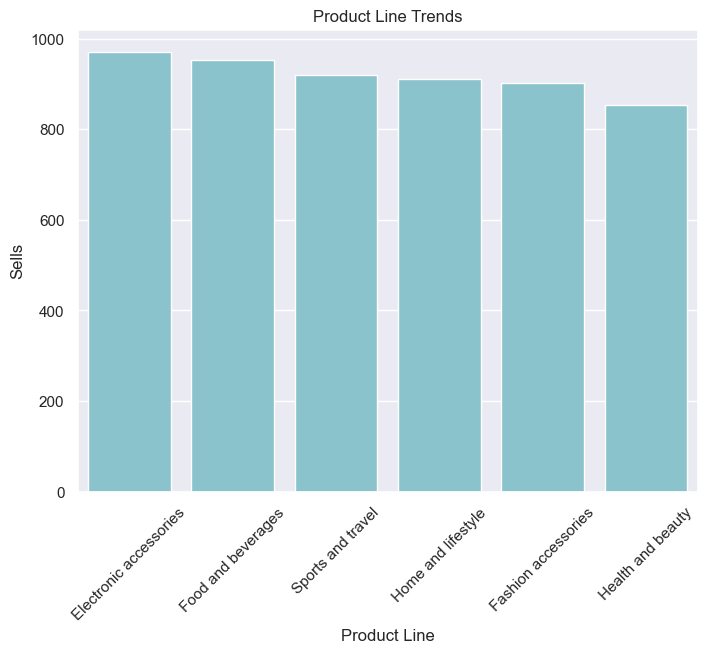

In [12]:
# Creating the data chart of products trends
plt.figure(figsize=(8,6))
sns.barplot(x='product_line', y='quantity', data=product_trend, hue='product_line', palette=['#7FCBD7'], legend=False)
plt.title('Product Line Trends')
plt.xlabel('Product Line')
plt.ylabel('Sells')
plt.xticks(rotation = 45)
plt.show()


As we can see, the product line that has more sales is `Electronic Accessories`. Let's review the trending products of each store branch.

### Store Branch Trend

In [13]:
# Grouping by branch, product line and sales
branch_product_trend = df.groupby(['branch','product_line'], as_index=False).agg({'quantity': 'sum'}).sort_values(by=['branch','quantity'], ascending=[True, False])

branch_product_trend

,branch,product_line,quantity
4,A,Home and lifestyle,371
5,A,Sports and travel,333
0,A,Electronic accessories,322
2,A,Food and beverages,313
1,A,Fashion accessories,263
3,A,Health and beauty,257
11,B,Sports and travel,322
9,B,Health and beauty,320
6,B,Electronic accessories,316
7,B,Fashion accessories,297


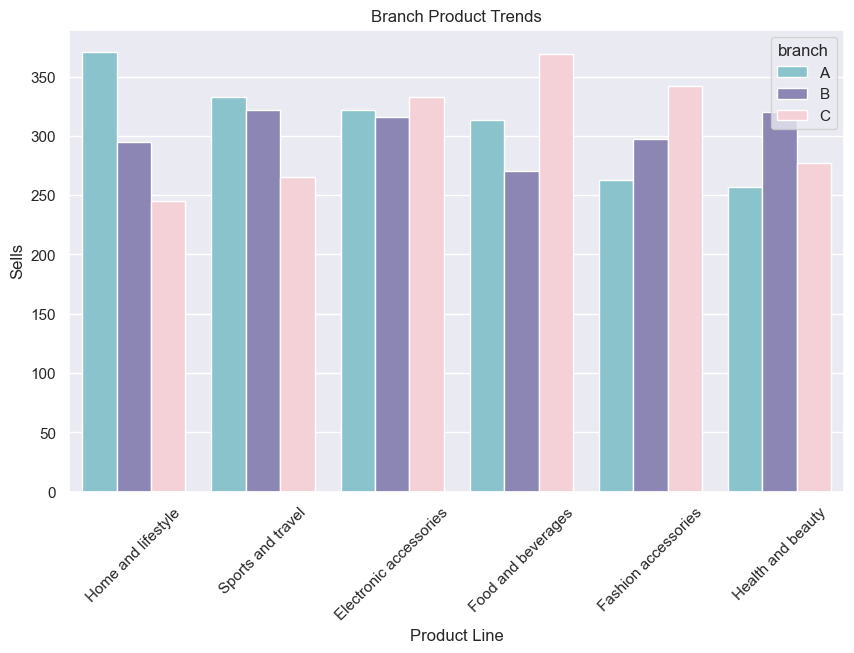

In [14]:
# Creating the data chart of branch products trends
plt.figure(figsize=(10,6))
sns.barplot(x='product_line', y='quantity', hue='branch', data=branch_product_trend, palette=['#7FCBD7', '#857EBB', '#FACBD3'])
plt.title('Branch Product Trends')
plt.xlabel('Product Line')
plt.ylabel('Sells')
plt.xticks(rotation = 45)
plt.show()

### Product Line Rating

Let's review the ratings of the different Product Line.

In [15]:
# Grouping per Product Line and rating
product_line_ratings = df.groupby('product_line', as_index=False).agg({'rating': 'mean'}).sort_values(by='rating', ascending=False)

product_line_ratings

,product_line,rating
2,Food and beverages,7.113218
1,Fashion accessories,7.029213
3,Health and beauty,7.003289
0,Electronic accessories,6.924706
5,Sports and travel,6.916265
4,Home and lifestyle,6.837500


As we can se the product with the most rating is `Food and Beverages` with a mean rating of 7.11.

### Product Line Tendency Per Month

In [16]:
# Grouping per Month and Product Line
product_per_month = df.groupby(['month','product_line'], as_index=False).agg({'quantity': 'sum'}).sort_values(by=['month','quantity'], ascending=False)

product_per_month

,month,product_line,quantity
16,3,Home and lifestyle,364
15,3,Health and beauty,334
12,3,Electronic accessories,325
17,3,Sports and travel,319
14,3,Food and beverages,278
13,3,Fashion accessories,271
8,2,Food and beverages,349
6,2,Electronic accessories,313
7,2,Fashion accessories,295
9,2,Health and beauty,266


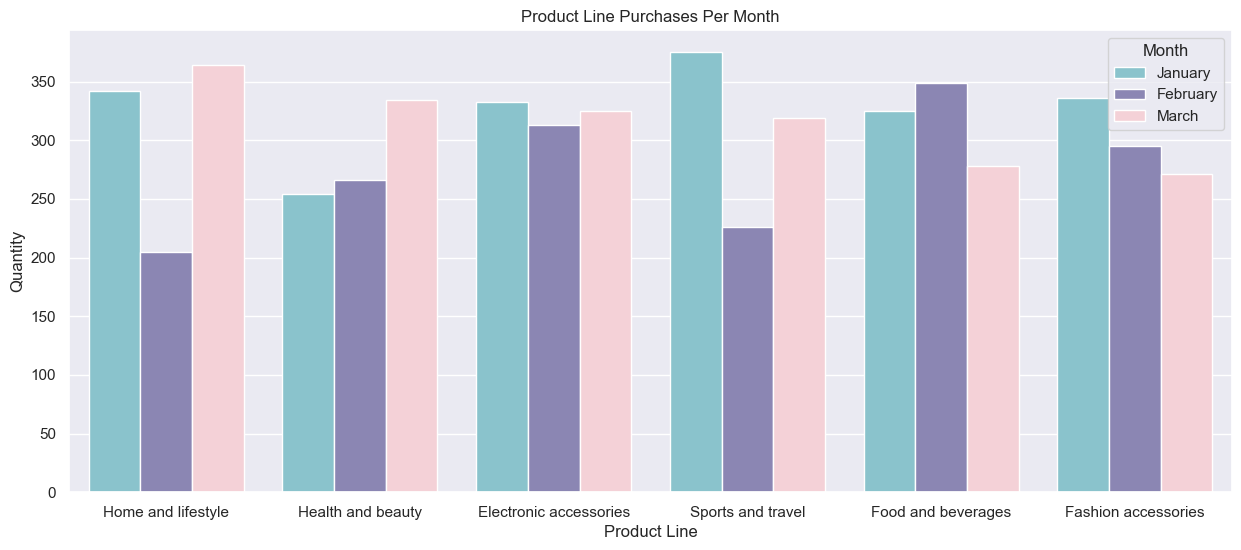

In [17]:
# Creating a Chart to show the results 
plt.figure(figsize=(15,6))
sns.barplot(data=product_per_month, x='product_line', y='quantity', hue='month', palette=['#7FCBD7', '#857EBB', '#FACBD3'])
plt.title("Product Line Purchases Per Month")
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['January', 'February', 'March']
plt.legend(handles = handles, labels=labels, title="Month")
plt.xlabel("Product Line")
plt.ylabel("Quantity")
plt.show()


### Sales per Month

In [65]:
# Grouping per month and summarize the quantity
sales_per_month = df.groupby('month', as_index=False).agg({'quantity':'sum'})

sales_per_month

,month,quantity
0,1,1965
1,2,1654
2,3,1891


### Conclusions Of The Section

According with these results, we can have the following conclusion:

* The most popular Product Line of the store is `Fashion Accessories`

For each store branch these are the most popular Product Line: 

* Store A: `Home and Lifestyle` and `Electronic Accessories`
* Store B: `Sports and Travel` and `Fashion Accessories`
* Store C: `Food and Beverages` and `Fashion Accessories`

The Product Line most popular per month were: 

* In January the product line with more sales was `Sports and Travel`.
* In February the product line with more sales was `Food and Beverages`.
* In March the product line with more sales was `Home and Lifestyle`.


## Customer Behavior

In this section we are going to review the behavior of the customers.

first of all, let's review the different kind of customers that the store have: 

* Customer Gender
* Customer Type

### Purchases Per Customer Gender


In [18]:
# Grouping per customer gender:
customer_gender = df.groupby('gender', as_index=False).agg({'quantity': 'sum', 'invoice_id': 'count'})

customer_gender

,gender,quantity,invoice_id
0,Female,2869,501
1,Male,2641,499


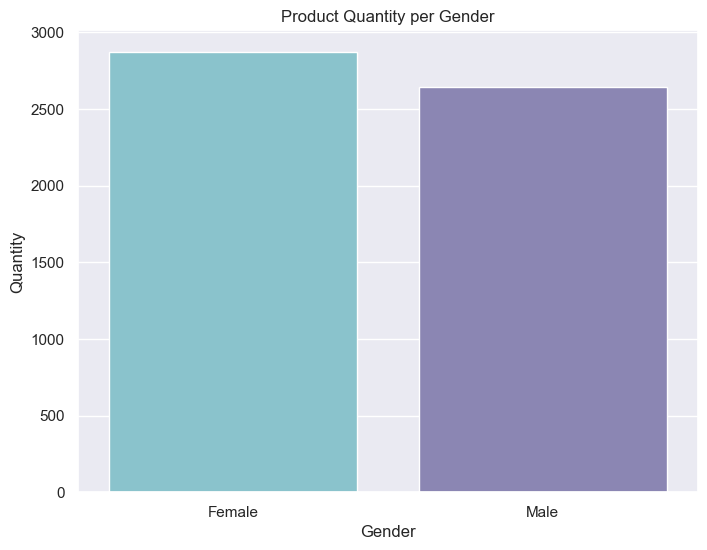

In [19]:
# Creating a chart of the results of the quantity of products by gender
plt.figure(figsize=(8,6))
sns.barplot(data=customer_gender, x='gender', y='quantity', hue='gender', palette=['#7FCBD7', '#857EBB'], legend=False)
plt.title("Product Quantity per Gender")
plt.xlabel("Gender")
plt.ylabel("Quantity")
plt.show()


### Purchases Per Customer Type And Gender

In [71]:
# Grouping per customer type and gender:
customer_type_gender = df.groupby(['gender', 'customer_type'], as_index=False).agg({'quantity': 'sum', 'invoice_id':'count'})

customer_type_gender

,gender,customer_type,quantity,invoice_id
0,Female,Member,1492,261
1,Female,Normal,1377,240
2,Male,Member,1293,240
3,Male,Normal,1348,259


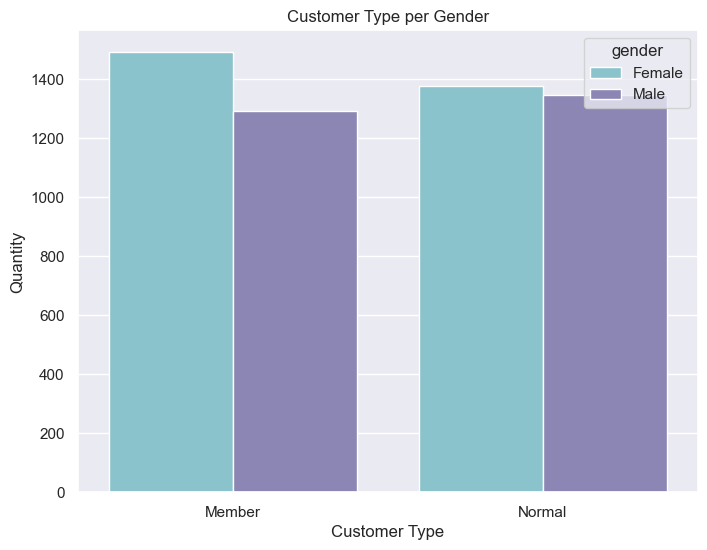

In [21]:

plt.figure(figsize=(8,6))
sns.barplot(data=customer_type_gender, x='customer_type', y='quantity', hue='gender', palette=['#7FCBD7', '#857EBB'])
plt.title("Customer Type per Gender")
plt.xlabel("Customer Type")
plt.ylabel("Quantity")
plt.show()


As we can see, the data contains almost the same amount of Female and Male customers but, Female customers buy more products that the Male customers. Male customers are more likely to be under the "Normal" scheme as opposed to Female customers who are more likely to be "Members" of the store but also Female customer on the "Normal" scheme buys more products that the Male customers in the same scheme.

Now let's see which products prefers each customer type and gender. 

### Purchases Per Product Line And Gender

In [22]:
# Grouping per customer gender and product_line
product_line_per_gender = df.groupby(['gender','product_line'], as_index=False).agg({'quantity': 'sum'}).sort_values(by='quantity', ascending=False)

product_line_per_gender

,gender,product_line,quantity
1,Female,Fashion accessories,530
2,Female,Food and beverages,514
9,Male,Health and beauty,511
4,Female,Home and lifestyle,498
5,Female,Sports and travel,496
0,Female,Electronic accessories,488
6,Male,Electronic accessories,483
8,Male,Food and beverages,438
11,Male,Sports and travel,424
10,Male,Home and lifestyle,413


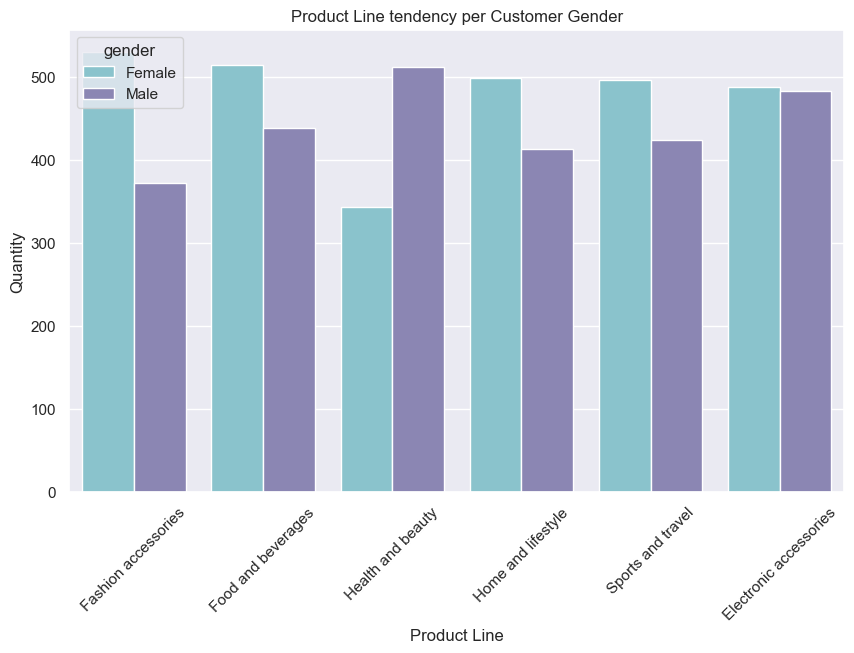

In [23]:
# Creating of the chart of the results of customer gender and product line
plt.figure(figsize=(10,6))
sns.barplot(data=product_line_per_gender, x='product_line', y='quantity', hue='gender', palette=['#7FCBD7', '#857EBB'])
plt.title("Product Line tendency per Customer Gender")
plt.xlabel("Product Line")
plt.ylabel("Quantity")
plt.xticks(rotation = 45)
plt.show()

### Purchases Per Product Line And Customer Type

In [24]:
# Grouping per customer type and product_line
product_line_per_customer_type = df.groupby(['customer_type','product_line'], as_index=False).agg({'quantity': 'sum'}).sort_values(by='quantity', ascending=False)

product_line_per_customer_type

,customer_type,product_line,quantity
6,Normal,Electronic accessories,542
2,Member,Food and beverages,506
5,Member,Sports and travel,493
4,Member,Home and lifestyle,490
7,Normal,Fashion accessories,463
8,Normal,Food and beverages,446
1,Member,Fashion accessories,439
0,Member,Electronic accessories,429
3,Member,Health and beauty,428
11,Normal,Sports and travel,427


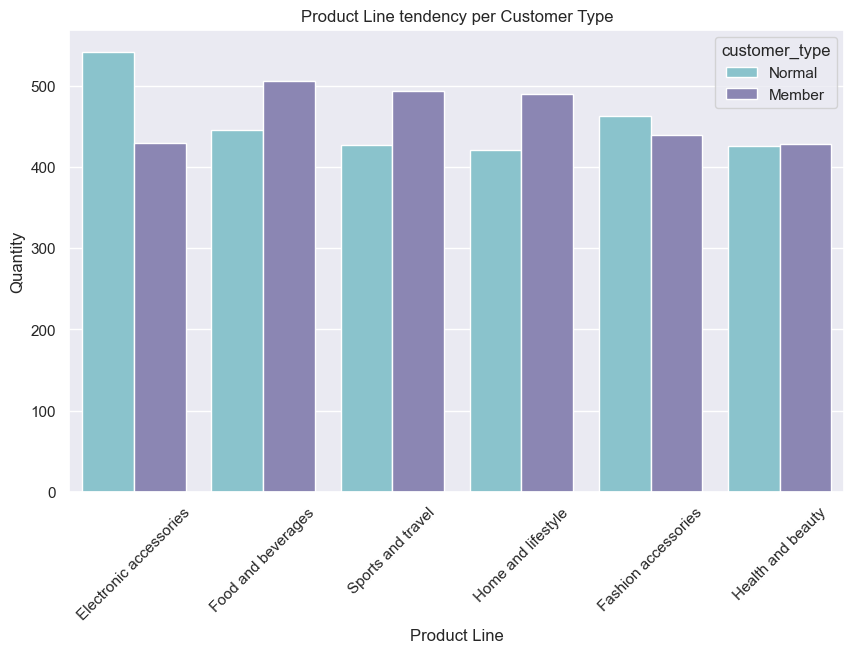

In [25]:
# Creating of the chart of the results of customer gender and product line
plt.figure(figsize=(10,6))
sns.barplot(data=product_line_per_customer_type, x='product_line', y='quantity', hue='customer_type', palette=['#7FCBD7', '#857EBB'])
plt.title("Product Line tendency per Customer Type")
plt.xlabel("Product Line")
plt.ylabel("Quantity")
plt.xticks(rotation = 45)
plt.show()

Now let's review the period of time of the dataset.

### Customer Behavior Per Date

In [26]:
# Reviewing the period of time of the dataset
print(f"The period of time of the dataset is from {df['date'].min()} to {df['date'].max()}" )

The period of time of the dataset is from 2019-01-01 00:00:00 to 2019-03-30 00:00:00


As we can see, the dataset is for 3 moths, thats enough time to review the behavior of the clients per date, day and month.

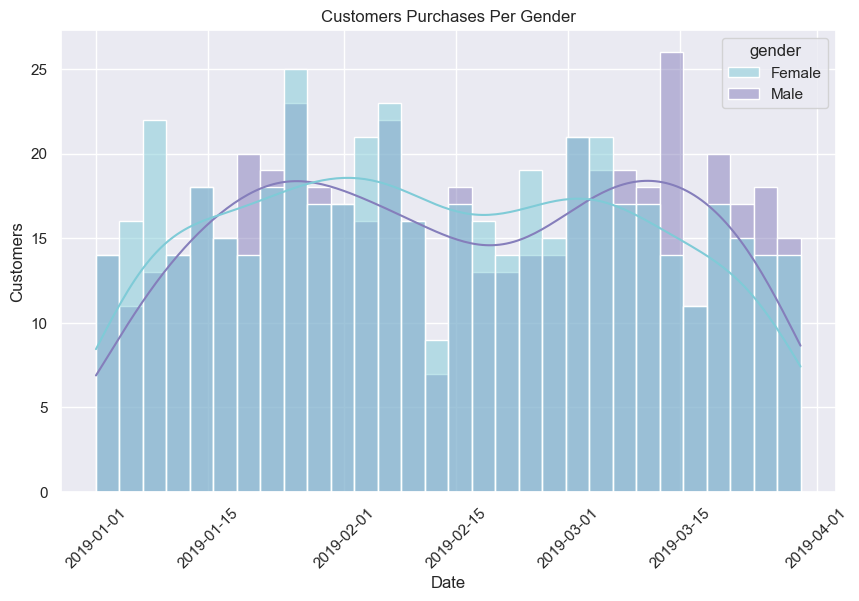

In [27]:
# Creating of the chart of the behavior per date
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='date', hue='gender',bins=30, kde=True, palette=['#7FCBD7', '#857EBB'])
plt.title('Customers Purchases Per Gender')
plt.xlabel('Date')
plt.ylabel('Customers')
plt.xticks(rotation = 45)
plt.show()

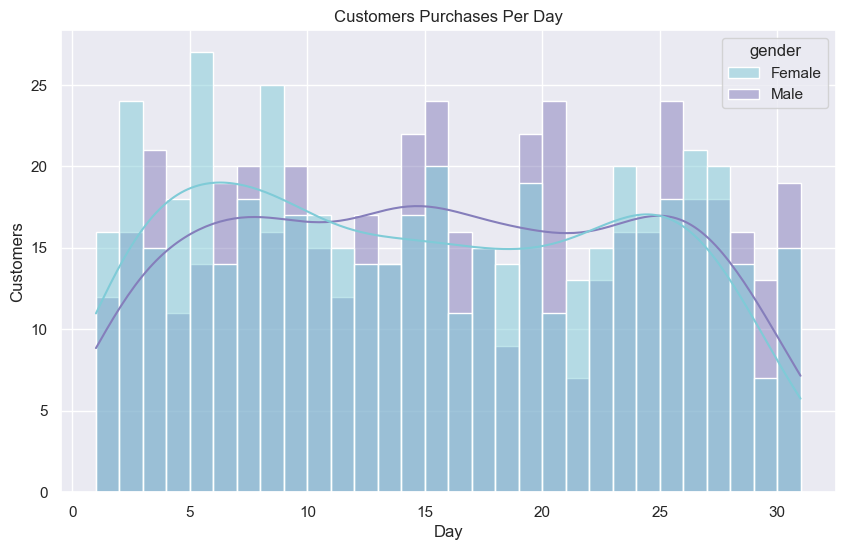

In [28]:
# Creating of the chart of the behavior
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='day', hue='gender',bins=30, kde=True, palette=['#7FCBD7', '#857EBB'])
plt.title('Customers Purchases Per Day')
plt.xlabel('Day')
plt.ylabel('Customers')
plt.show()

In [29]:
# Grouping per month and per gender
customer_per_date = df.groupby(['month', 'gender'], as_index=False).agg({'quantity': 'sum'}).sort_values(by='month', ascending=False)

customer_per_date.head(10)

,month,gender,quantity
4,3,Female,899
5,3,Male,992
2,2,Female,951
3,2,Male,703
0,1,Female,1019
1,1,Male,946


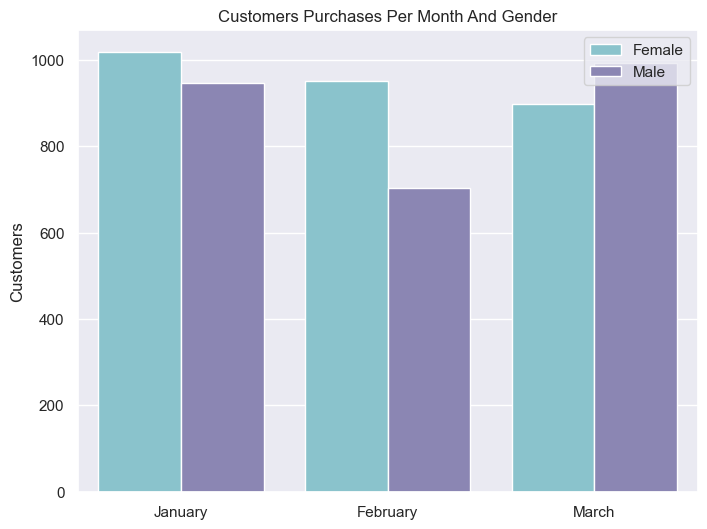

In [30]:
# Creating of the chart of the behavior per month
plt.figure(figsize=(8,6))
sns.barplot(data=customer_per_date, x='month', y='quantity', hue='gender', palette=['#7FCBD7', '#857EBB'])
plt.title("Customers Purchases Per Month And Gender")
plt.xlabel("")
plt.ylabel("Customers")
plt.xticks([0,1,2],['January','February', 'March'])
plt.legend(loc="best")
plt.show()

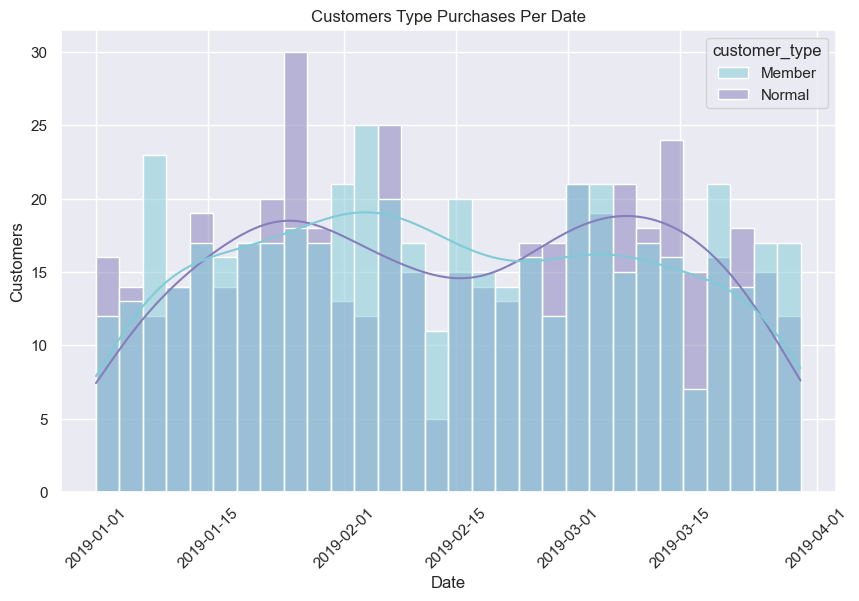

In [31]:
# Creating of the chart of the behavior per date
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='date', hue='customer_type',bins=30, kde=True, palette=['#7FCBD7', '#857EBB'])
plt.title('Customers Type Purchases Per Date')
plt.xlabel('Date')
plt.ylabel('Customers')
plt.xticks(rotation = 45)
plt.show()

In [32]:
# Grouping per customer type and month
customer_type_date = df.groupby(['month', 'customer_type'], as_index=False).agg({'quantity': 'sum'}).sort_values(by='month', ascending=False)

customer_type_date

,month,customer_type,quantity
4,3,Member,983
5,3,Normal,908
2,2,Member,838
3,2,Normal,816
0,1,Member,964
1,1,Normal,1001


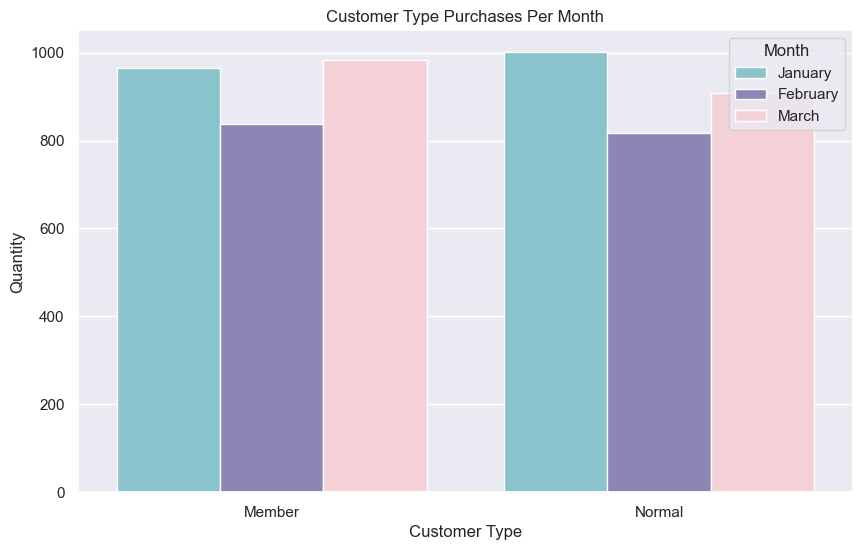

In [33]:
# Creating a Chart to show the results 
plt.figure(figsize=(10,6))
sns.barplot(data=customer_type_date, x='customer_type', y='quantity', hue='month', palette=['#7FCBD7', '#857EBB', '#FACBD3'])
plt.title("Customer Type Purchases Per Month")
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['January', 'February', 'March']
plt.legend(handles = handles, labels=labels, title="Month")
plt.xlabel("Customer Type")
plt.ylabel("Quantity")
plt.show()


### Product Line Purchases Per Month and Gender

In [34]:
# Pivot table of product line purchases per month and per gender
table_gender_purchases_per_month = df.pivot_table(values='quantity', index=['month','gender'], columns='product_line', aggfunc='sum')

table_gender_purchases_per_month

product_line  Electronic accessories  Fashion accessories  Food and beverages  \
month gender                                                                    
1     Female                     149                  197                 169   
      Male                       184                  139                 156   
2     Female                     191                  185                 190   
      Male                       122                  110                 159   
3     Female                     148                  148                 155   
      Male                       177                  123                 123   

product_line  Health and beauty  Home and lifestyle  Sports and travel  
month gender                                                            
1     Female                 96                 198                210  
      Male                  158                 144                165  
2     Female                140                  96                149  
      Male                  126                 109                 77  
3     Female                107                 204                137  
      Male                  227                 160                182

In [35]:
# Grouping per month, product line and gender
gender_purchases_per_month = df.groupby(['month','gender','product_line'], as_index = False).agg({'quantity': 'sum'}).sort_values(by=['gender','month','quantity'], ascending=[False, True, False])

gender_purchases_per_month.head()

,month,gender,product_line,quantity
6,1,Male,Electronic accessories,184
11,1,Male,Sports and travel,165
9,1,Male,Health and beauty,158
8,1,Male,Food and beverages,156
10,1,Male,Home and lifestyle,144


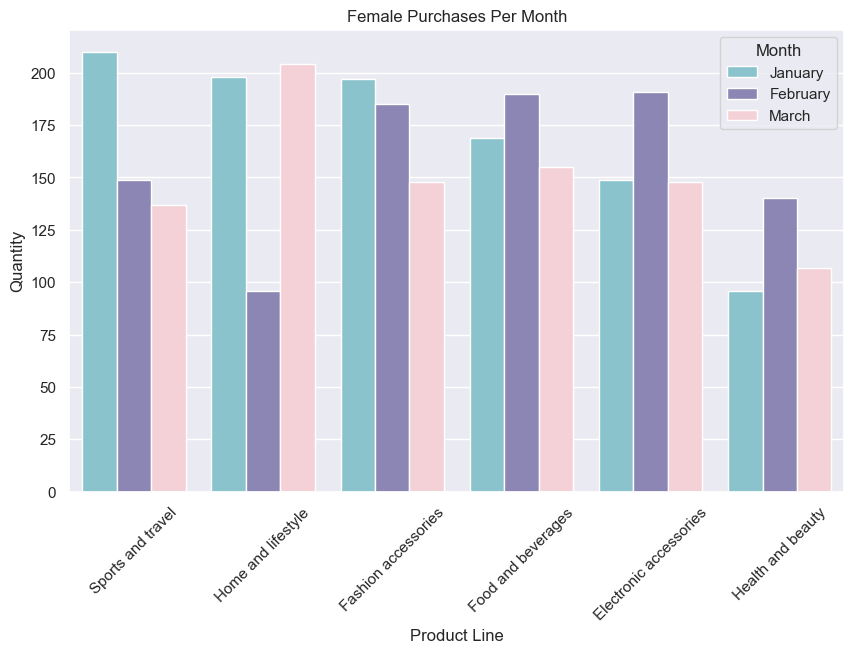

In [36]:
# Creating chart for the purchases of the Female customers per Month
plt.figure(figsize=(10,6))
sns.barplot(data=gender_purchases_per_month[gender_purchases_per_month['gender'] == 'Female'].sort_values(by=['month','quantity'], ascending=[True, False]), x = 'product_line', y='quantity', hue='month', palette=['#7FCBD7', '#857EBB', '#FACBD3'])
plt.title("Female Purchases Per Month")
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['January', 'February', 'March']
plt.legend(handles = handles, labels=labels, title="Month")
plt.xlabel("Product Line")
plt.ylabel("Quantity")
plt.xticks(rotation = 45)
plt.show()
plt.show()



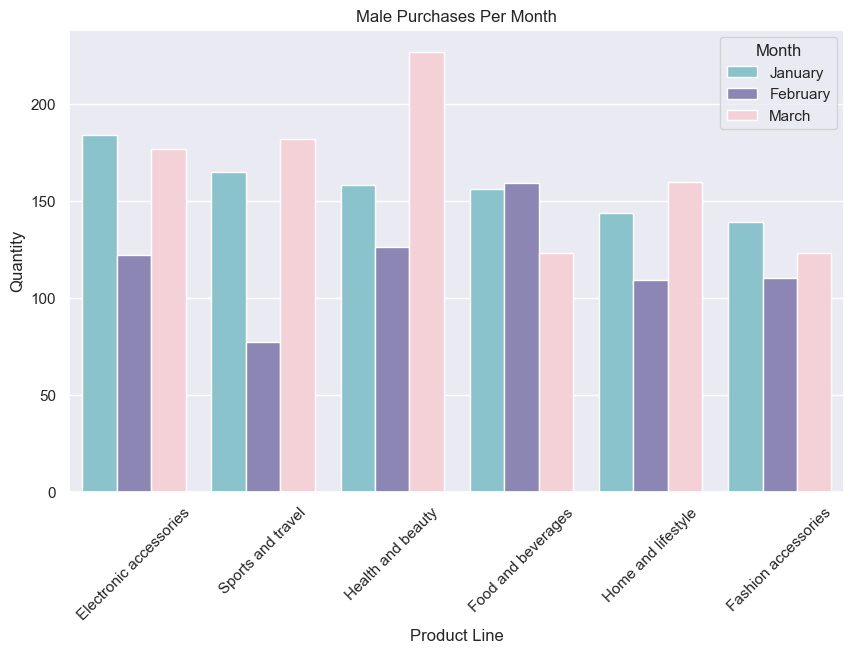

In [37]:
# Creating chart for the purchases of the Female customers per Month
plt.figure(figsize=(10,6))
sns.barplot(data=gender_purchases_per_month[gender_purchases_per_month['gender'] == 'Male'].sort_values(by=['month','quantity'], ascending=[True, False]), x = 'product_line', y='quantity', hue='month', palette=['#7FCBD7', '#857EBB', '#FACBD3'])
plt.title("Male Purchases Per Month")
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['January', 'February', 'March']
plt.legend(handles = handles, labels=labels, title="Month")
plt.xlabel("Product Line")
plt.ylabel("Quantity")
plt.xticks(rotation = 45)
plt.show()
plt.show()


## Conclusions Of The Section

According with this results we can conclude the following:
* The data contains almost the same amount of Female and Male customers:
  * Female users: 501
  * Male users: 499
* Female customer buy more products in both schemes ("Normal" and "Member") that the Male customers
  * Normal: 1,377 sales in total
  * Member: 1,492 sales in total
* Male customers are more likely to be under the "Normal" scheme with 1,348 sales in total
* Female customers are more likely to be "Members" of the store with 261 users
* Female Customers are more used to buy `Fashion Accessories` products with 530 purchases and `Food And Beverages` products with 514 purchases
* Male Customers are more used to buy `Health and Beauty` products with 511 purchases and `Electronic Accessories` products with 483 purchases
* Normal Customers are more used to buy `Electronic Accessories` products with 542 purchases.
* Member Customers are more used to buy `Food and Beverages` (506 purchases), `Sport and Travel` (493 purchases) and `Home and Lifestyle` (490 purchases) products.
* For each month, Female customers buys: 
  * January: `Sport and Travel` products with 210 purchases.
  * February: `Electronic Accessories` products with 191 purchases.
  * March: `Home and Lifestyle` products with 204 purchases.
* For each month, Male customers buys: 
  * January: `Electronic Accessories` products with 184 purchases.
  * February: `Food and Beverages` products with 159 purchases.
  * March: `Health and Beauty` products with 227 purchases. 

# Revenue Performance

For this section we are going to review the revenue of the store.

Let's begging with the revenue per product line.

## Product Line Revenue

In [51]:
# Grouping by product line and obtaining the revenue
product_revenue = df.groupby(['product_line','branch'], as_index=False).agg({'gross_income':'sum'}).sort_values(by=['branch', 'gross_income'], ascending=[True, False])

product_revenue

,product_line,branch,gross_income
12,Home and lifestyle,A,1067.4855
15,Sports and travel,A,922.5095
0,Electronic accessories,A,872.2435
6,Food and beverages,A,817.2905
3,Fashion accessories,A,777.7385
9,Health and beauty,A,599.8930
16,Sports and travel,B,951.8190
10,Health and beauty,B,951.4600
13,Home and lifestyle,B,835.6745
1,Electronic accessories,B,811.9735


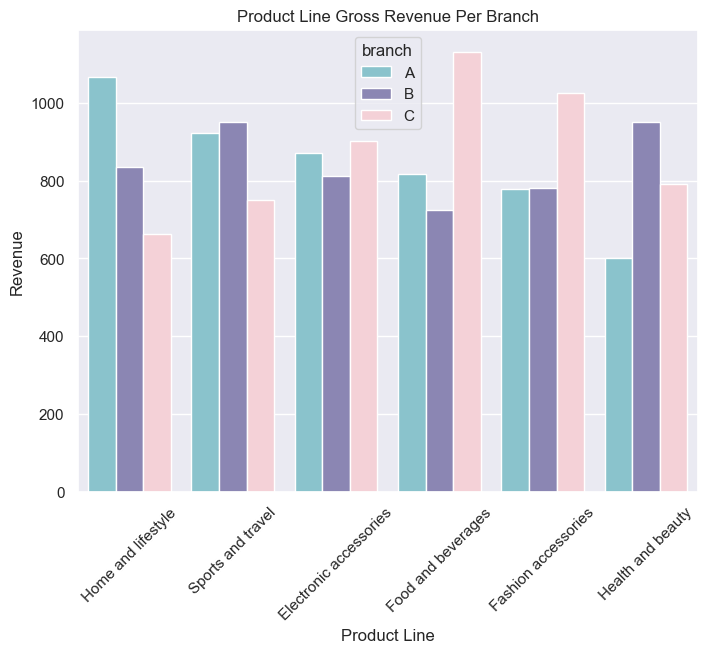

In [64]:
# Creating the data chart of Product Line Gross Income
plt.figure(figsize=(8,6))
sns.barplot(x='product_line', y='gross_income', data=product_revenue, hue = 'branch', palette =['#7FCBD7', '#857EBB', '#FACBD3'])
plt.title('Product Line Gross Revenue Per Branch')
plt.xlabel('Product Line')
plt.ylabel('Revenue')
plt.xticks(rotation = 45)
plt.show()

The product line that has generated the most revenue for each branch are:

* Branch A: `Home and Lifestyle` with $1,067.49
* Branch B: `Sport and Travel` and `Health and Beauty` with $951.00
* Branch C: `Food and Beverages` with $1,131.76

## Revenue Per Gender

Now let's group the data by customer genre and let's find which genre has the most revenue. 

In [40]:
# Grouping by genre and Summarize the revenue
revenue_per_gender = df.groupby(['gender', 'customer_type'], as_index=False).agg({'gross_income': 'sum'})

revenue_per_gender

,gender,customer_type,gross_income
0,Female,Member,4197.4735
1,Female,Normal,3796.9515
2,Male,Member,3622.6905
3,Male,Normal,3762.2535


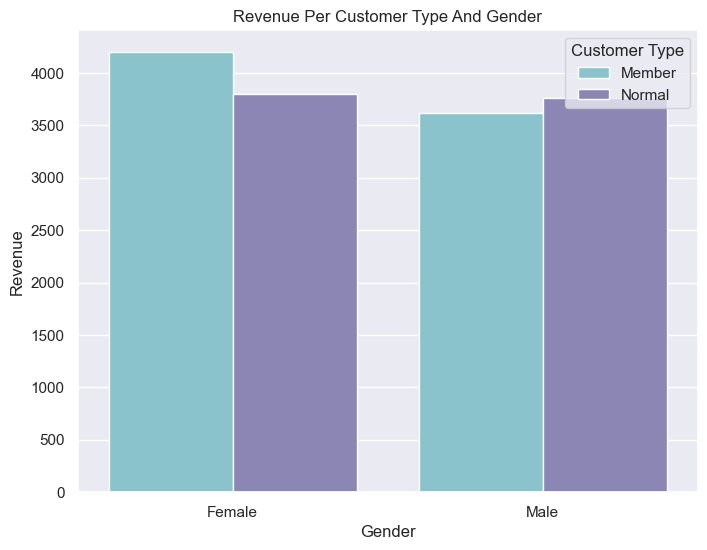

In [62]:
# Creating a Chart for the results
plt.figure(figsize=(8,6))
sns.barplot(data = revenue_per_gender, x = 'gender', y = 'gross_income', hue='customer_type', palette=['#7FCBD7', '#857EBB'])
plt.title('Revenue Per Customer Type And Gender')
plt.xlabel('Gender')
plt.ylabel('Revenue')
plt.legend(title = 'Customer Type')
plt.show()

Member Female customers has the more revenue with almost $4,200.00.

## Revenue Per Branch

In [42]:
# Grouping per customer type and summarize the gross income
revenue_per_branch = df.groupby('branch', as_index=False).agg({'gross_income': 'sum'})

revenue_per_branch

,branch,gross_income
0,A,5057.1605
1,B,5057.0320
2,C,5265.1765


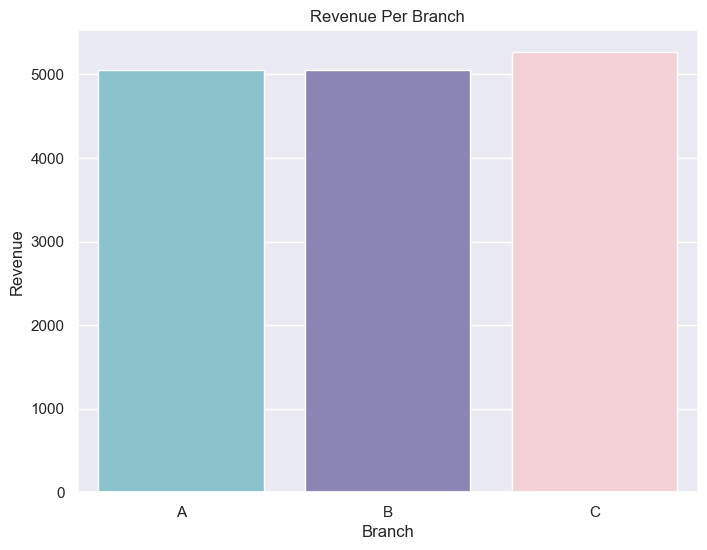

In [63]:
# Creating a Chart for the revenue for each branch
plt.figure(figsize=(8,6))
sns.barplot(data = revenue_per_branch, x='branch', y = 'gross_income', hue = 'branch', palette=['#7FCBD7', '#857EBB', '#FACBD3'], legend = False)
plt.title('Revenue Per Branch')
plt.xlabel('Branch')
plt.ylabel('Revenue')
plt.show()

The Branch "C" has the most revenue with $5,265.00.

## Revenue Per Month

In [54]:
# Grouping per Month and Gross Income
revenue_per_month = df.groupby(['month', 'branch'], as_index=False).agg({'gross_income': 'sum'})

revenue_per_month

,month,branch,gross_income
0,1,A,1841.9585
1,1,B,1770.2885
2,1,C,1925.4610
3,2,A,1421.9105
4,2,B,1639.2510
5,2,C,1568.3325
6,3,A,1793.2915
7,3,B,1647.4925
8,3,C,1771.3830


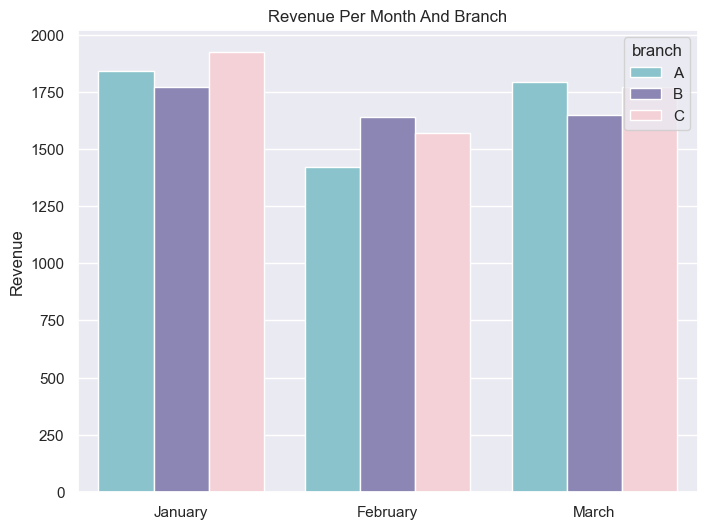

In [60]:
# Creating the chart for the revenue per month
plt.figure(figsize=(8,6))
sns.barplot(data = revenue_per_month, x = 'month', y = 'gross_income', hue='branch', palette=['#7FCBD7', '#857EBB', '#FACBD3'])
plt.title('Revenue Per Month And Branch')
plt.xlabel('')
plt.ylabel('Revenue')
plt.xticks([0,1,2],['January','February', 'March'])
plt.show()

### Product Line Revenue Per Month

In [69]:
# Grouping per Month and Product Line and summarize the gross revenue
revenue_per_product_month = df.groupby(['month', 'product_line'], as_index=False).agg({'gross_income':'sum'}).sort_values(by=['month','gross_income'], ascending=[True,False])

revenue_per_product_month

,month,product_line,gross_income
5,1,Sports and travel,1031.7630
4,1,Home and lifestyle,975.9400
2,1,Food and beverages,931.9300
1,1,Fashion accessories,921.1960
0,1,Electronic accessories,896.7280
3,1,Health and beauty,780.1510
8,2,Food and beverages,952.3980
7,2,Fashion accessories,905.2315
6,2,Electronic accessories,826.8050
9,2,Health and beauty,695.3455


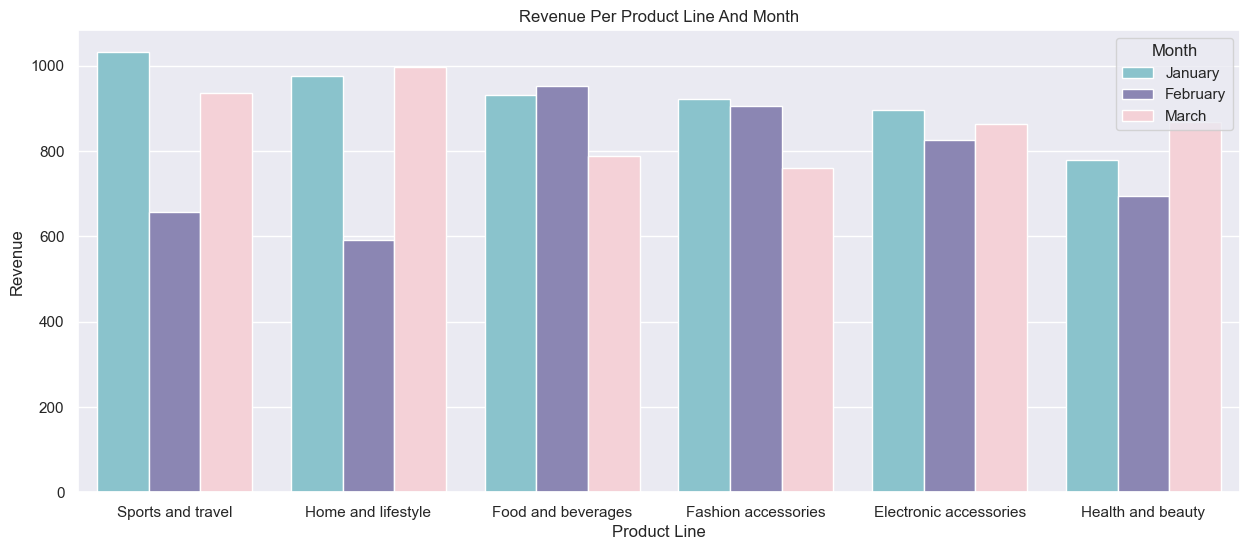

In [70]:
# Creating a chart for the revenue of month and product line
# Creating a Chart to show the results 
plt.figure(figsize=(15,6))
sns.barplot(data=revenue_per_product_month, x='product_line', y='gross_income', hue='month', palette=['#7FCBD7', '#857EBB', '#FACBD3'])
plt.title("Revenue Per Product Line And Month")
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['January', 'February', 'March']
plt.legend(handles = handles, labels=labels, title="Month")
plt.xlabel("Product Line")
plt.ylabel("Revenue")
plt.show()


* The product line `Sports and Travel` has the most revenue in January with $1,031.76.
* The product line `Food and Beverages` has the most revenue in February with $952.40.
* The product line `Home and Lifestyle` has the most revenue in March with $996.80.

In [66]:
# Grouping per Month and Gross Income
revenue_month = df.groupby('month', as_index=False).agg({'gross_income': 'sum'})

revenue_month

,month,gross_income
0,1,5537.708
1,2,4629.494
2,3,5212.167


January was the month with most revenue with $5,537.00. 

For each branch January was the month with more revenue.

## Conclusions of the Section

According with the results of this section we find the following behavior: 

* The product line `Food and Beverages` has the most revenue of all with $2,673.56
* Female customers has the most revenue with $7,994.43, which:
  * Members has $4,197.47
  * Normal has $3,796.95
* Normal Male customers has the most revenue that Member Male customers with $3,762.25
* The store "C" has the most revenue with $5,265.18
* The month with more sales was January, with a revenue of $5,537.71

The product line that has generated the most revenue for each branch are:

* Branch A: `Home and Lifestyle` with $1,067.49
* Branch B: `Sport and Travel` and `Health and Beauty` with $951.00
* Branch C: `Food and Beverages` with $1,131.76

# Conclusions

According with the results in this analysis we find the following behavior: 

The product line more popular for each branch coincides with the product line with most revenue:

* Branch A: The Product Line with more sales is `Home and Lifestyle` with 371 sales and have a revenue of $1,067.49
* Branch B: The Product Line with more sales is `Sports and Travel` with 322 sales and have a revenue of $951.00
* Branch C: The Product Line with more sales is `Food and Beverages` with 369 sales and have a revenue of $1,131.76

January was the month with more sales with 1,965 sales and a revenue of $5,537.71. The sales decrease in February with 1,654 sales and a revenue of $4,629.49. And lastly in March the sales increase with 1891 sales and a revenue of $5,212.17.

For each month the product line with more sales were: 

* January: `Sports and Travel` with 375 sales and a revenue of $1,031.76
* February: `Food and Beverages` with 349 sales and a revenue of $952.40
* March: `Home and Lifestyle` with 364 sales and a revenue of $996.80

* The data contains almost the same amount of Female and Male customers:
  * Female users: 501
  * Male users: 499
* Female customer buy more products in both schemes ("Normal" and "Member") that the Male customers
  * Normal: 1,377 sales in total
  * Member: 1,492 sales in total
* Male customers are more likely to be under the "Normal" scheme with 1,348 sales in total
* Female customers are more likely to be "Members" of the store with 261 users
* Female Customers are more used to buy `Fashion Accessories` products with 530 purchases and `Food And Beverages` products with 514 purchases
* Male Customers are more used to buy `Health and Beauty` products with 511 purchases and `Electronic Accessories` products with 483 purchases
* Normal Customers are more used to buy `Electronic Accessories` products with 542 purchases.
* Member Customers are more used to buy `Food and Beverages` (506 purchases), `Sport and Travel` (493 purchases) and `Home and Lifestyle` (490 purchases) products.
* For each month, Female customers buys: 
  * January: `Sport and Travel` products with 210 purchases.
  * February: `Electronic Accessories` products with 191 purchases.
  * March: `Home and Lifestyle` products with 204 purchases.
* For each month, Male customers buys: 
  * January: `Electronic Accessories` products with 184 purchases.
  * February: `Food and Beverages` products with 159 purchases.
  * March: `Health and Beauty` products with 227 purchases. 
